In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('real-estate_data.csv')

In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.isnull().sum()*100/len(df)

brokered_by        0.203604
status             0.000000
price              0.069215
bed               21.618797
bath              22.986666
acre_lot          14.624130
street             0.488056
city               0.063197
state              0.000359
zip_code           0.013430
house_size        25.533983
prev_sold_date    32.981627
dtype: float64

In [6]:
df=df.dropna()

In [7]:
df['zip_code']=df['zip_code'].astype(int)


In [8]:
df['bed']=df['bed'].astype(int)

In [9]:
df['bath']=df['bath'].astype(int)


In [10]:
df['street']=df['street'].astype(int)


In [11]:
df['brokered_by']=df['brokered_by'].astype(int)


In [12]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147,for_sale,110000.0,7,3,0.09,1842706,Dorado,Puerto Rico,949,1192.0,2019-06-28
2270,94933,for_sale,950000.0,5,4,0.99,1260473,Saint Thomas,Virgin Islands,802,5000.0,2013-10-11
2277,103341,for_sale,6899000.0,4,6,0.83,17467,Saint Thomas,Virgin Islands,802,4600.0,2018-04-05
3409,21163,for_sale,525000.0,3,3,0.45,1813270,Agawam,Massachusetts,1001,2314.0,2014-06-25
3410,67455,for_sale,289900.0,3,2,0.36,1698080,Agawam,Massachusetts,1001,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009,sold,359900.0,4,2,0.33,353094,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208,sold,350000.0,3,2,0.10,1062149,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856,sold,440000.0,6,3,0.50,405677,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618,sold,179900.0,2,1,0.09,761379,Richland,Washington,99354,933.0,2022-03-24


In [13]:
df.isnull().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084909 entries, 502 to 2226381
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1084909 non-null  int32  
 1   status          1084909 non-null  object 
 2   price           1084909 non-null  float64
 3   bed             1084909 non-null  int32  
 4   bath            1084909 non-null  int32  
 5   acre_lot        1084909 non-null  float64
 6   street          1084909 non-null  int32  
 7   city            1084909 non-null  object 
 8   state           1084909 non-null  object 
 9   zip_code        1084909 non-null  int32  
 10  house_size      1084909 non-null  float64
 11  prev_sold_date  1084909 non-null  object 
dtypes: float64(3), int32(5), object(4)
memory usage: 86.9+ MB


In [15]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06,1.084909e+06
mean,5.357678e+04,5.687041e+05,3.363451e+00,2.519739e+00,1.195407e+01,9.291065e+05,5.589184e+04,2.074974e+03
std,3.047812e+04,1.181611e+06,1.363310e+00,1.305497e+00,7.953078e+02,5.295896e+05,2.994955e+04,2.767609e+03
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.700000e+01,6.020000e+02,1.000000e+02
25%,2.425500e+04,2.400000e+05,3.000000e+00,2.000000e+00,1.400000e-01,4.688700e+05,3.022300e+04,1.347000e+03
50%,5.301600e+04,3.800000e+05,3.000000e+00,2.000000e+00,2.100000e-01,9.320000e+05,5.544600e+04,1.792000e+03
75%,7.922100e+04,6.000000e+05,4.000000e+00,3.000000e+00,4.100000e-01,1.388381e+06,8.521500e+04,2.438000e+03
max,1.101420e+05,5.150000e+08,4.440000e+02,2.220000e+02,1.000000e+05,2.001125e+06,9.990100e+04,1.560780e+06


In [16]:
numerical_data=df.select_dtypes(include='number').columns

In [17]:
numerical_data

Index(['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'zip_code',
       'house_size'],
      dtype='object')

In [18]:
numerical_col=df[['brokered_by', 'price', 'bed', 'bath', 'acre_lot', 'street', 'zip_code',
       'house_size']]

In [19]:
numerical_col

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
502,92147,110000.0,7,3,0.09,1842706,949,1192.0
2270,94933,950000.0,5,4,0.99,1260473,802,5000.0
2277,103341,6899000.0,4,6,0.83,17467,802,4600.0
3409,21163,525000.0,3,3,0.45,1813270,1001,2314.0
3410,67455,289900.0,3,2,0.36,1698080,1001,1276.0
...,...,...,...,...,...,...,...,...
2226377,23009,359900.0,4,2,0.33,353094,99354,3600.0
2226378,18208,350000.0,3,2,0.10,1062149,99354,1616.0
2226379,76856,440000.0,6,3,0.50,405677,99354,3200.0
2226380,53618,179900.0,2,1,0.09,761379,99354,933.0


In [20]:
correlation=numerical_col.corr()

<Axes: >

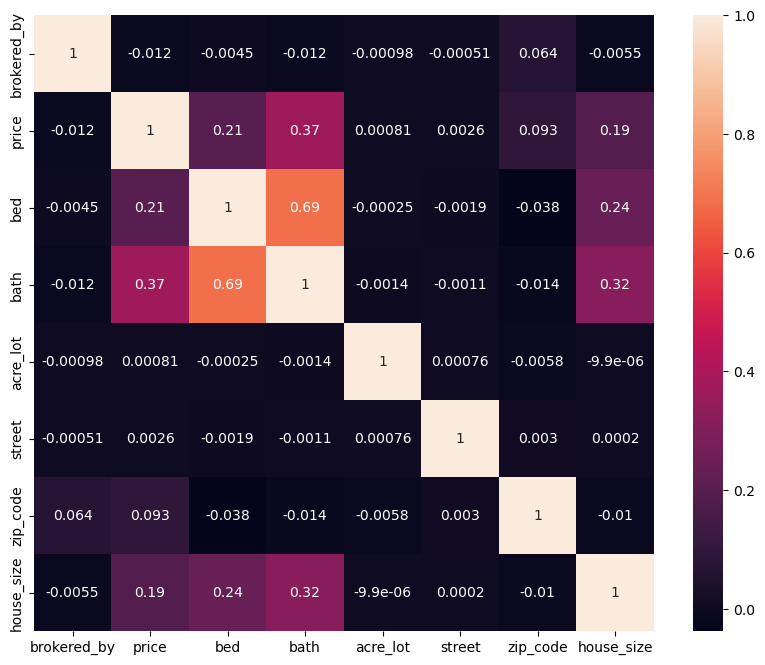

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

In [22]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147,for_sale,110000.0,7,3,0.09,1842706,Dorado,Puerto Rico,949,1192.0,2019-06-28
2270,94933,for_sale,950000.0,5,4,0.99,1260473,Saint Thomas,Virgin Islands,802,5000.0,2013-10-11
2277,103341,for_sale,6899000.0,4,6,0.83,17467,Saint Thomas,Virgin Islands,802,4600.0,2018-04-05
3409,21163,for_sale,525000.0,3,3,0.45,1813270,Agawam,Massachusetts,1001,2314.0,2014-06-25
3410,67455,for_sale,289900.0,3,2,0.36,1698080,Agawam,Massachusetts,1001,1276.0,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009,sold,359900.0,4,2,0.33,353094,Richland,Washington,99354,3600.0,2022-03-25
2226378,18208,sold,350000.0,3,2,0.10,1062149,Richland,Washington,99354,1616.0,2022-03-25
2226379,76856,sold,440000.0,6,3,0.50,405677,Richland,Washington,99354,3200.0,2022-03-24
2226380,53618,sold,179900.0,2,1,0.09,761379,Richland,Washington,99354,933.0,2022-03-24


In [23]:
df['status'].unique()

array(['for_sale', 'sold'], dtype=object)

In [24]:
df['brokered_by'].nunique()

82809

In [25]:
df['city'].unique()

array(['Dorado', 'Saint Thomas', 'Agawam', ..., 'Royal City', 'Touchet',
       'Anatone'], dtype=object)

In [26]:
status_g=df.groupby('status')['price'].count()
status_g

status
for_sale    477983
sold        606926
Name: price, dtype: int64

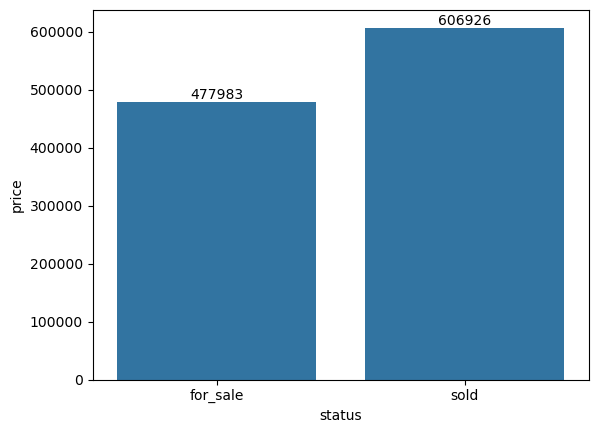

In [27]:
status_bar=sns.barplot(status_g)
for bars in status_bar.containers:
    status_bar.bar_label(bars)

In [28]:
df['state'].nunique()

53

In [63]:
state_grp=df.groupby(['state'],as_index=False)['price'].mean().sort_values(by='price',ascending=False).head(3)
state_grp

,state,price
11,Hawaii,1457250
47,Virgin Islands,1291675
8,District of Columbia,1188105


In [65]:
bed_grp=df.groupby(['bed'],as_index=False)['price'].sum().head(7)
bed_grp

,bed,price
0,1,5801803220
1,2,56141174301
2,3,216930704280
3,4,192419086839
4,5,86941039001
5,6,32107361953
6,7,11404358355


In [31]:
pd.set_option('display.float_format','{:.0f}'.format)

In [67]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147,for_sale,110000,7,3,0,1842706,Dorado,Puerto Rico,949,1192,2019-06-28
2270,94933,for_sale,950000,5,4,1,1260473,Saint Thomas,Virgin Islands,802,5000,2013-10-11
2277,103341,for_sale,6899000,4,6,1,17467,Saint Thomas,Virgin Islands,802,4600,2018-04-05
3409,21163,for_sale,525000,3,3,0,1813270,Agawam,Massachusetts,1001,2314,2014-06-25
3410,67455,for_sale,289900,3,2,0,1698080,Agawam,Massachusetts,1001,1276,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009,sold,359900,4,2,0,353094,Richland,Washington,99354,3600,2022-03-25
2226378,18208,sold,350000,3,2,0,1062149,Richland,Washington,99354,1616,2022-03-25
2226379,76856,sold,440000,6,3,0,405677,Richland,Washington,99354,3200,2022-03-24
2226380,53618,sold,179900,2,1,0,761379,Richland,Washington,99354,933,2022-03-24


In [75]:
df['brokered_by'].nunique()

82809

In [77]:
filtered_status=df[df['status']=='sold']
filtered_status

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414374,72457,sold,524900,3,2,0,1850809,Aguada,Puerto Rico,602,2200,2021-12-13
1414376,61711,sold,90000,3,2,0,141421,Aguadilla,Puerto Rico,603,1421,2021-10-19
1414377,49592,sold,22500,2,1,0,1889894,Anasco,Puerto Rico,610,850,2021-12-30
1414378,72408,sold,168000,6,4,0,1157317,Anasco,Puerto Rico,610,3422,2021-10-21
1414379,60830,sold,200000,3,1,5,1855411,Arecibo,Puerto Rico,612,580,2022-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009,sold,359900,4,2,0,353094,Richland,Washington,99354,3600,2022-03-25
2226378,18208,sold,350000,3,2,0,1062149,Richland,Washington,99354,1616,2022-03-25
2226379,76856,sold,440000,6,3,0,405677,Richland,Washington,99354,3200,2022-03-24
2226380,53618,sold,179900,2,1,0,761379,Richland,Washington,99354,933,2022-03-24


In [83]:
filtered_status.groupby(['brokered_by'],as_index=False)['status'].count().head(7)

,brokered_by,status
0,0,9
1,2,7
2,3,2
3,4,2
4,6,5
5,7,1
6,12,2


In [87]:
filtered_status1=df[df['status']=='for_sale']
filtered_status1

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
502,92147,for_sale,110000,7,3,0,1842706,Dorado,Puerto Rico,949,1192,2019-06-28
2270,94933,for_sale,950000,5,4,1,1260473,Saint Thomas,Virgin Islands,802,5000,2013-10-11
2277,103341,for_sale,6899000,4,6,1,17467,Saint Thomas,Virgin Islands,802,4600,2018-04-05
3409,21163,for_sale,525000,3,3,0,1813270,Agawam,Massachusetts,1001,2314,2014-06-25
3410,67455,for_sale,289900,3,2,0,1698080,Agawam,Massachusetts,1001,1276,2012-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1414193,56985,for_sale,450000,3,2,0,1158475,Juneau,Alaska,99801,1412,2018-01-12
1414316,21688,for_sale,525000,3,2,0,1003563,Ketchikan,Alaska,99901,1272,2007-06-12
1414327,57432,for_sale,1100000,4,4,0,1280711,Ketchikan,Alaska,99901,3600,2011-09-09
1414344,38040,for_sale,559000,4,3,0,975856,Ketchikan,Alaska,99901,1920,2021-03-30


In [89]:
filtered_status1.groupby(['brokered_by'],as_index=False)['status'].count().head(7)

,brokered_by,status
0,0,2
1,2,2
2,4,3
3,5,1
4,7,1
5,8,164
6,10,1
